In [2]:
import numpy as np
import pandas as pd
from functools import reduce
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# Merge datasets

In [74]:
# fermented = pd.read_csv('../data/Fermented.csv').replace('-', 0 )
# cheesy = pd.read_csv('../data/Cheesy.csv').replace('-', 0 )
# milky = pd.read_csv('../data/Milky.csv').replace('-', 0 )
# fruity = pd.read_csv('../data/Fruity.csv').replace('-', 0 )

In [75]:
# df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['Sample'],
#                                             how='outer'), [fermented,cheesy,milky,fruity ])
# df_merged = df_merged.fillna(0)
# compounds = [ x  for x in list(df_merged['Sample']) if x!= 'Label' ]
# df_merged = df_merged.set_index(['Sample'])
# df_merged = df_merged.T
# df_merged = df_merged[ compounds + ['Label']]
# df_merged.index.names = ['index']
# df_merged = df_merged.rename(columns={'Sample': 'index'})
# samples = list(df_merged.index)
# df_merged = df_merged.reset_index().drop(['index'],axis=1)
# df_merged['Sample'] = samples
# df_merged = df_merged[ ['Sample'] + compounds + ['Label']]
# df_merged.to_csv('../data/Merged.csv',index=None)

In [3]:
df_merged = pd.read_csv('../data/Merged.csv')
df_merged.head()

,Sample,Acetaldehyde,"2,3-Butanedione","2,3-Pentanedione",2-Heptanone,3-hydroxy-2-butanone,1-Hexanol,Dimethyl trisulfide,2-nonanone,Acetic acid,...,Octanoic acid,Nonanoic acid,delta-Decalactone,Decanoic acid,Ethyl acetate,2-Nonanone,Heptanoic acid,benzaldehyde,Acetoin,Label
0,S01_1,0.000000,4759.377435,0.000000,0.000000,10314.338680,0.000000,0.0,43.713108,20870.83696,...,579.264433,657.148532,52.493293,769.289225,0.0,0.0,0.0,0.0,0.0,Fermented
1,S01_2,175.678662,0.000000,245.184336,19.793842,8973.718394,8.747135,0.0,40.830214,12410.18980,...,720.219120,0.000000,36.644951,797.585066,0.0,0.0,0.0,0.0,0.0,Fermented
2,S01_3,39.771663,4076.815137,0.000000,0.000000,11026.299710,9.050112,0.0,0.000000,16725.86066,...,697.415010,657.435742,82.377589,834.719861,0.0,0.0,0.0,0.0,0.0,Fermented
3,S12_1,93.677511,2054.903717,0.000000,26.785561,12404.010240,0.000000,0.0,38.103403,31289.57444,...,4276.357165,748.514095,85.056011,4682.549658,0.0,0.0,0.0,0.0,0.0,Fermented
4,S12_2,352.146773,1441.210308,0.000000,0.000000,23850.622210,0.000000,0.0,42.444187,89363.27943,...,4935.870446,735.619714,103.920625,5240.778609,0.0,0.0,0.0,0.0,0.0,Fermented


(array([24.,  0.,  0., 15.,  0.,  0., 15.,  0.,  0.,  6.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

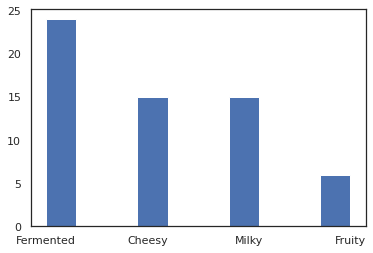

In [9]:
sns.set_theme(style="white")
plt.hist(df_merged['Label'])

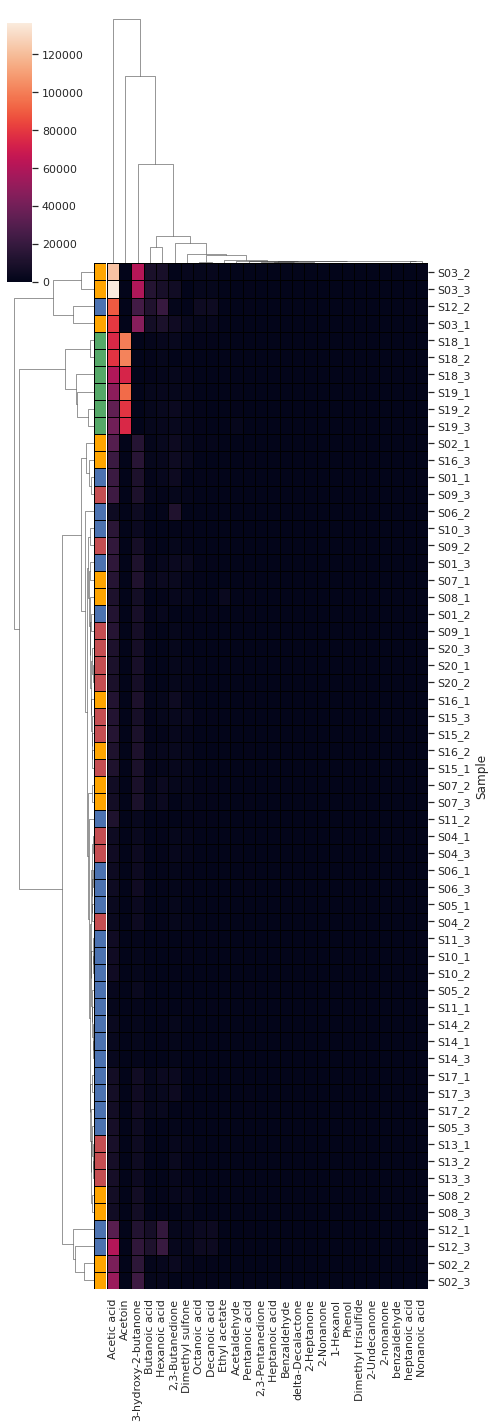

In [26]:
temp_pd = df_merged.copy()
temp_pd = (temp_pd.set_index(['Sample'])).drop(['Label'],axis=1)
color_label = {'Fermented':'b','Cheesy':'orange','Milky':'r','Fruity':'g'}
row_colors = []
for i in range(len(df_merged.index)):
    row_colors.append( color_label[ list(df_merged['Label'])[i] ] )
g = sns.clustermap(temp_pd, yticklabels=True,xticklabels=True, row_colors = row_colors,
                   linecolor='black',linewidths=1,figsize=(7,20))

# PCA

In [4]:
X = df_merged.iloc[:,1:-1].values
X = StandardScaler().fit_transform(X)

In [5]:
pca_transform = PCA(n_components=3)
X_pca = pca_transform.fit_transform(X)
print(pca_transform.explained_variance_ratio_)

[0.26695196 0.13812138 0.11135513]


In [6]:
X_pca_pd = pd.DataFrame(X_pca, columns=['PC1(26.7%)','PC2(13.8%)','PC3(11.1%)'])
X_pca_pd['Label'] = list(df_merged['Label'])

<AxesSubplot:xlabel='PC2(13.8%)', ylabel='PC3(11.1%)'>

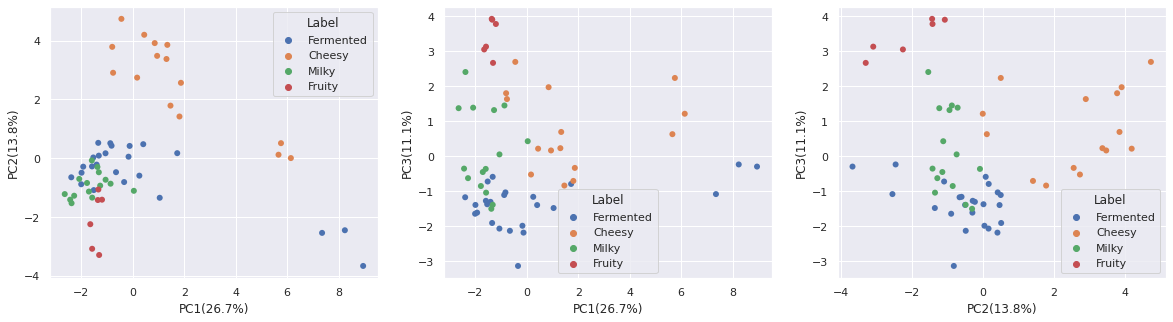

In [7]:
sns.set_theme(style="darkgrid")
hue_order = ['Fermented','Cheesy','Milky','Fruity']
f, axs = plt.subplots(1,3,figsize=(20,5))
sns.scatterplot(x='PC1(26.7%)', y='PC2(13.8%)',hue="Label",
                hue_order=hue_order,linewidth=0,data=X_pca_pd, ax=axs[0])
sns.scatterplot(x="PC1(26.7%)", y="PC3(11.1%)",hue="Label",
                hue_order=hue_order,linewidth=0,data=X_pca_pd, ax=axs[1])
sns.scatterplot(x="PC2(13.8%)", y="PC3(11.1%)",hue="Label",
                hue_order=hue_order,linewidth=0,data=X_pca_pd, ax=axs[2])